### Import Libraries

In [101]:
import os
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

### Creating Features and Labels

In [102]:
people = ['Ben Afflek', 'Elton John', 'Jerry Seinfield', 'Madonna', 'Mindy Kaling']
DIR = r'Faces\train'
features = []
labels = []

In [103]:
face_detector = cv.CascadeClassifier('haarcascade_frontalface_default.xml')

In [104]:
for index, person in enumerate(people):
    path = os.path.join(DIR, person)
    label = index
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        img = cv.imread(img_path)
        gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
        faces_rect = face_detector.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=4)
        for (x, y, w, h) in faces_rect:
            detected_face = gray[y:y+h, x:x+w]
            features.append(detected_face)
            labels.append(label)

### Training

In [105]:
features = np.array(features, dtype='object')
labels = np.array(labels)

face_recognizer = cv.face.LBPHFaceRecognizer_create()
face_recognizer.train(features, labels)

### Save the Model

In [106]:
face_recognizer.save('model/face_trained.yml')
np.save('model/features.npy', features)
np.save('model/labels.npy', labels)

### Face Recognition

In [107]:
# features = np.load('model/features.npy', allow_pickle=True)
# labels = np.load('model/labels.npy')

face_recognizer = cv.face.LBPHFaceRecognizer_create()
face_recognizer.read('model/face_trained.yml')

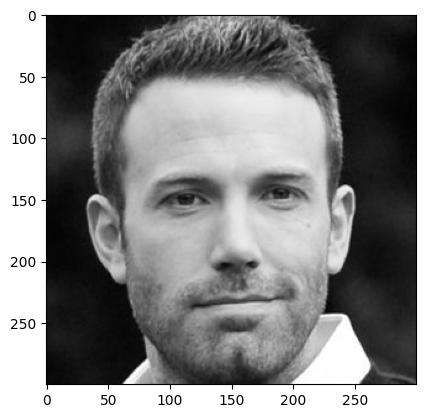

In [108]:
img = cv.imread('Faces/val/ben_afflek/2.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(cv.cvtColor(gray, cv.COLOR_BGR2RGB))

Label = Ben Afflek with a loss of 60.069416291380506


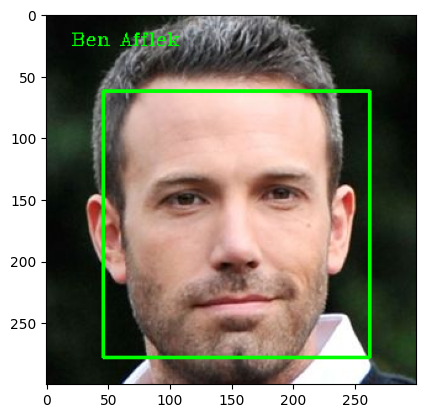

In [109]:
faces_rect = face_detector.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=4)
for (x, y, w, h) in faces_rect:
    detected_face = gray[y:y+h, x:x+w]
    label, loss = face_recognizer.predict(detected_face)
    print(f'Label = {people[label]} with a loss of {loss}')

    cv.putText(img, str(people[label]), (20,25), cv.FONT_HERSHEY_COMPLEX, 0.5, (0,255,0), thickness=1)
    cv.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))